In [1]:
import pandas as pd  # Mengimpor library pandas untuk manipulasi data

# Load the dataset
file_path = "ObesityDataSet.csv"
df = pd.read_csv(file_path)  # Membaca file CSV menjadi DataFrame

# Tampilkan beberapa baris pertama dan informasi umum
info = df.info()  # Menampilkan info umum dataset seperti jumlah data, null, dan tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [2]:
# Kolom-kolom numerik yang perlu dikonversi
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Loop melalui kolom numerik dan coba konversi ke numeric, errors='coerce' akan mengubah nilai yang tidak valid menjadi NaN
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Setelah konversi, Anda mungkin memiliki missing values (NaN) yang perlu ditangani


In [3]:
# Tampilkan beberapa baris pertama dan informasi umum
info = df.info()  # Menampilkan info umum dataset seperti jumlah data, null, dan tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2089 non-null   float64
 1   Gender                          2102 non-null   object 
 2   Height                          2089 non-null   float64
 3   Weight                          2092 non-null   float64
 4   CALC                            2106 non-null   object 
 5   FAVC                            2100 non-null   object 
 6   FCVC                            2093 non-null   float64
 7   NCP                             2089 non-null   float64
 8   SCC                             2101 non-null   object 
 9   SMOKE                           2106 non-null   object 
 10  CH2O                            2096 non-null   float64
 11  family_history_with_overweight  2098 non-null   object 
 12  FAF                             20

In [4]:
# Tampilkan 5 baris pertama
print("Beberapa baris pertama:")
print(df.head())

Beberapa baris pertama:
    Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.0   no    no   2.0   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  3.0  yes   yes   3.0   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  3.0   no    no   2.0   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  3.0   no    no   2.0   
4  22.0    Male    1.78    89.8   Sometimes   no   2.0  1.0   no    no   2.0   

  family_history_with_overweight  FAF  TUE       CAEC                 MTRANS  \
0                            yes  0.0  1.0  Sometimes  Public_Transportation   
1                            yes  3.0  0.0  Sometimes  Public_Transportation   
2                            yes  2.0  1.0  Sometimes  Public_Transportation   
3                             no  2.0  0.0  Sometimes                Walking   
4                             no  0.0  0.0  Sometimes  Public_Transportation   

            NO

In [5]:
# Tampilkan deskripsi statistik dari data numerik
print("\nDeskripsi statistik:")
print(df.describe())  # Menampilkan ringkasan statistik untuk kolom numerik
# Tampilkan jumlah baris dan kolom
print("\nJumlah baris dan kolom:", df.shape)


Deskripsi statistik:
               Age       Height       Weight         FCVC          NCP  \
count  2089.000000  2089.000000  2092.000000  2093.000000  2089.000000   
mean     24.717928     1.706623    88.608184     2.443519     2.729418   
std       8.391323     0.117700    36.154617     0.642754     0.981124   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.955257     1.630000    66.000000     2.000000     2.675411   
50%      22.814657     1.701284    83.000000     2.397284     3.000000   
75%      26.000000     1.770000   108.055736     3.000000     3.000000   
max     106.441252     2.853986   441.131078     8.706795    12.299828   

              CH2O          FAF          TUE  
count  2096.000000  2092.000000  2096.000000  
mean      2.030560     1.073435     0.680138  
std       0.737945     1.149364     0.717160  
min       1.000000     0.000000     0.000000  
25%       1.569911     0.129009     0.000000  
50%       2.000000     1.0000

In [6]:
#Menampilkan jumlah NaN dan ? (missing values)
print(f"Jumlah data kosong (NaN): {df[col].isna().sum()}, jumlah '?' sebagai missing: {(df[col] == '?').sum()}")

Jumlah data kosong (NaN): 15, jumlah '?' sebagai missing: 0


In [7]:
# 6. Cek keberadaan missing values
print("\nMissing Values:")
print(df.isnull().sum())  # Menghitung jumlah nilai kosong (NaN) di setiap kolom


Missing Values:
Age                               22
Gender                             9
Height                            22
Weight                            19
CALC                               5
FAVC                              11
FCVC                              18
NCP                               22
SCC                               10
SMOKE                              5
CH2O                              15
family_history_with_overweight    13
FAF                               19
TUE                               15
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [8]:
# 7. Cek data duplikat
print("\nJumlah Data Duplikat:")
print(df.duplicated().sum())


Jumlah Data Duplikat:
18


In [9]:
# 8. Cek nilai unik per kolom
for col in df.columns:
    print(f"\nKolom: {col}")
    print("Nilai unik:")
    print(df[col].unique())
    print(f"Total nilai unik: {df[col].nunique(dropna=True)}")


    #Menampilkan jumlah NaN dan ? (missing values)
    print(f"Jumlah data kosong (NaN): {df[col].isna().sum()}, jumlah '?' sebagai missing: {(df[col] == '?').sum()}")


Kolom: Age
Nilai unik:
[21.       23.       27.       ... 22.524036 24.361936 23.664709]
Total nilai unik: 1393
Jumlah data kosong (NaN): 22, jumlah '?' sebagai missing: 0

Kolom: Gender
Nilai unik:
['Female' 'Male' '?' nan]
Total nilai unik: 3
Jumlah data kosong (NaN): 9, jumlah '?' sebagai missing: 13

Kolom: Height
Nilai unik:
[1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]
Total nilai unik: 1561
Jumlah data kosong (NaN): 22, jumlah '?' sebagai missing: 0

Kolom: Weight
Nilai unik:
[ 64.        56.        77.       ... 133.689352 133.346641 133.472641]
Total nilai unik: 1517
Jumlah data kosong (NaN): 19, jumlah '?' sebagai missing: 0

Kolom: CALC
Nilai unik:
['no' 'Sometimes' 'Frequently' '?' 'Always' nan]
Total nilai unik: 5
Jumlah data kosong (NaN): 5, jumlah '?' sebagai missing: 15

Kolom: FAVC
Nilai unik:
['no' 'yes' '?' nan]
Total nilai unik: 3
Jumlah data kosong (NaN): 11, jumlah '?' sebagai missing: 11

Kolom: FCVC
Nilai unik:
[2.         3.         1.           

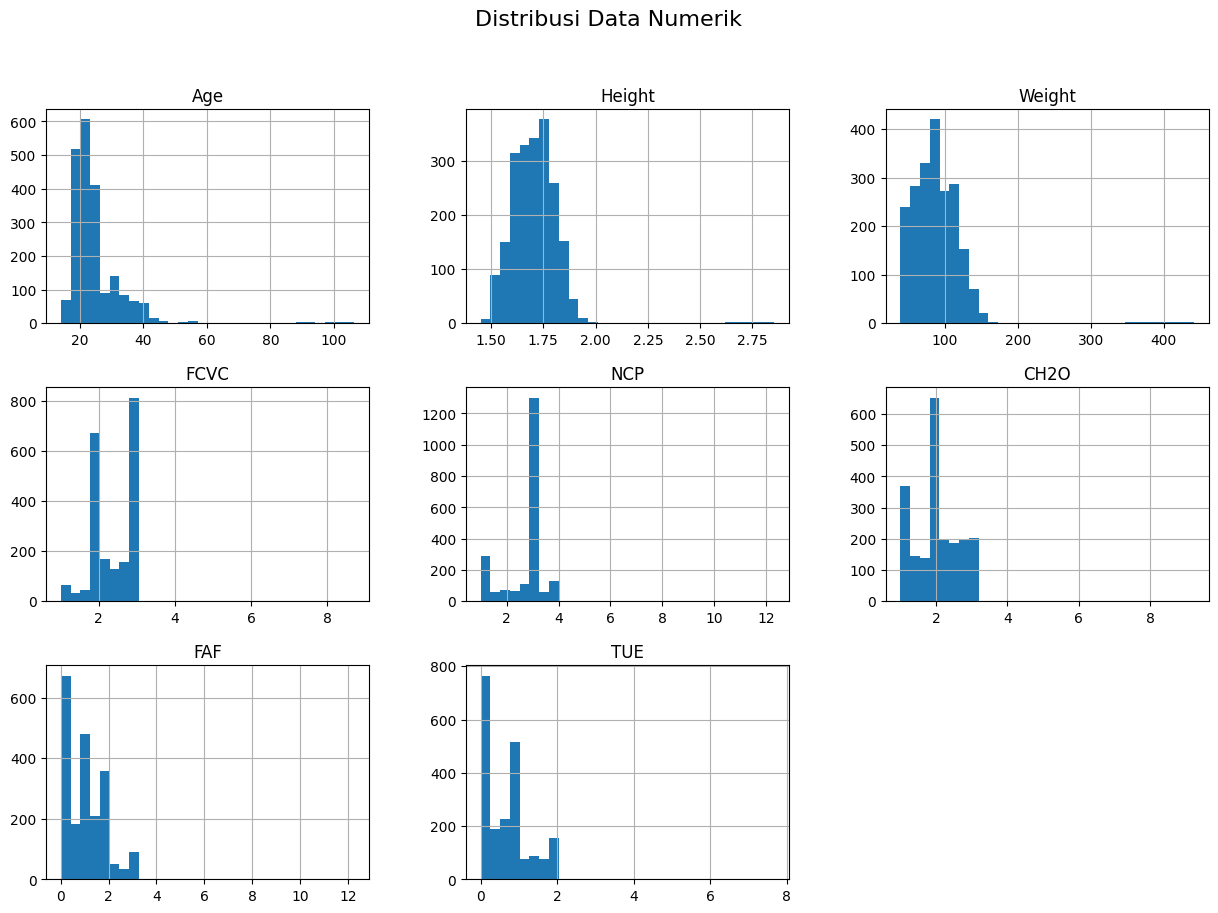

In [10]:
import matplotlib.pyplot as plt  # Mengimpor matplotlib untuk visualisasi data
# 9. Visualisasi distribusi data numerik
df[numerical_columns].hist(bins=30, figsize=(15, 10))  # Membuat histogram untuk distribusi kolom numerik
plt.suptitle("Distribusi Data Numerik", fontsize=16)
plt.show()  # Menampilkan grafik

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10388\3077885387.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='NObeyesdad', palette='Set2')  # Membuat bar chart frekuensi kategori


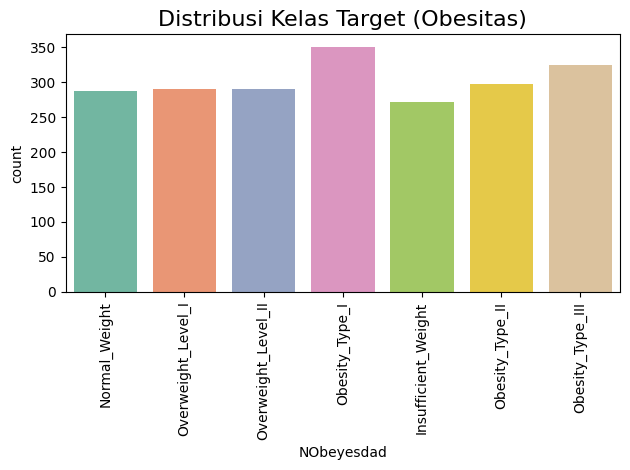

In [11]:
# 10. Visualisasi distribusi kategori target (NObeyesdad)
import seaborn as sns  # Mengimpor seaborn untuk visualisasi statistik
sns.countplot(data=df, x='NObeyesdad', palette='Set2')  # Membuat bar chart frekuensi kategori
plt.title('Distribusi Kelas Target (Obesitas)', fontsize=16)  # Menambahkan judul grafik
plt.xticks(rotation=90)  # Rotasi label menjadi vertikal
plt.tight_layout()  # Untuk memastikan layout tidak terpotong
plt.show()  # Menampilkan grafik

In [12]:
# Cek jumlah missing values di setiap kolom
missing_values = df.isnull().sum()  # Menghitung jumlah nilai kosong (NaN) di setiap kolom
print("Jumlah Missing Values per Kolom:\n", missing_values)

Jumlah Missing Values per Kolom:
 Age                               22
Gender                             9
Height                            22
Weight                            19
CALC                               5
FAVC                              11
FCVC                              18
NCP                               22
SCC                               10
SMOKE                              5
CH2O                              15
family_history_with_overweight    13
FAF                               19
TUE                               15
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [13]:
# Cek jumlah unique values di setiap kolom
unique_values = df.nunique()
print("\nJumlah Unique Values per Kolom:\n", unique_values)


Jumlah Unique Values per Kolom:
 Age                               1393
Gender                               3
Height                            1561
Weight                            1517
CALC                                 5
FAVC                                 3
FCVC                               807
NCP                                636
SCC                                  3
SMOKE                                3
CH2O                              1262
family_history_with_overweight       3
FAF                               1185
TUE                               1129
CAEC                                 5
MTRANS                               6
NObeyesdad                           7
dtype: int64


In [14]:
# Untuk melihat unique values pada kolom tertentu (misalnya, 'Gender'):
print("\nUnique Values pada Kolom Gender:", df['Gender'].unique())


Unique Values pada Kolom Gender: ['Female' 'Male' '?' nan]


In [15]:
# Cek jumlah data duplikat
duplicate_count = df.duplicated().sum()
print("\nJumlah Data Duplikat:", duplicate_count)

# Untuk melihat baris-baris yang duplikat:
# df_duplicates = df[df.duplicated(keep=False)] # keep=False menandai semua duplikat
# print("\nBaris Data Duplikat:\n", df_duplicates)


Jumlah Data Duplikat: 18


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10388\241194231.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='NObeyesdad', palette='viridis')  # Membuat bar chart frekuensi kategori



Distribusi Keseimbangan Data (Kolom NObeyesdad):
 NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


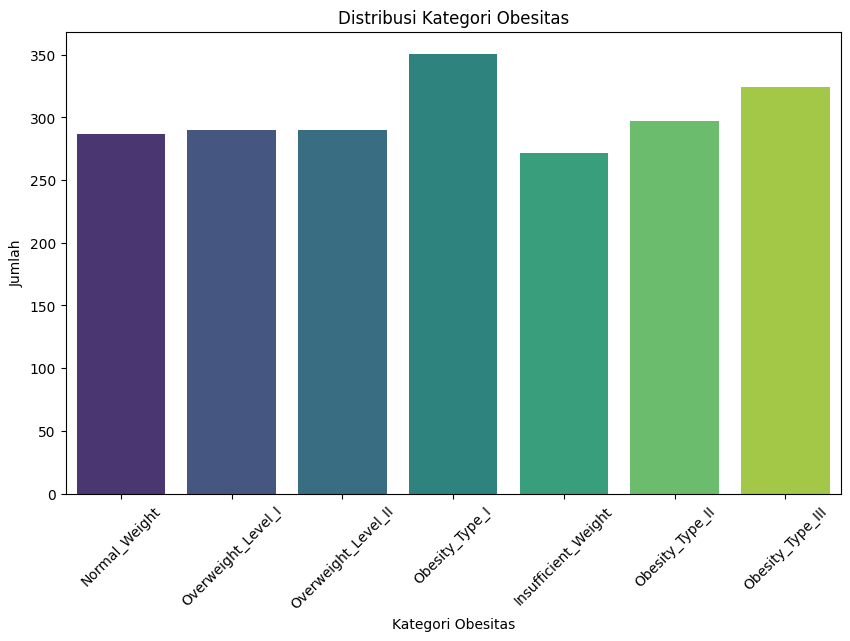

In [16]:
# Cek keseimbangan data pada kolom target 'NObeyesdad'
class_distribution = df['NObeyesdad'].value_counts()  # Menghitung jumlah kemunculan setiap kategori dalam kolom
print("\nDistribusi Keseimbangan Data (Kolom NObeyesdad):\n", class_distribution)


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NObeyesdad', palette='viridis')  # Membuat bar chart frekuensi kategori
plt.title('Distribusi Kategori Obesitas')  # Menambahkan judul grafik
plt.xlabel('Kategori Obesitas')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)  # memiringkan label sumbu X sebesar 45 derajat
plt.show()  # Menampilkan grafik

In [17]:
import numpy as np

# Konversi kolom-kolom numerik ke tipe data numerik
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [18]:

# Hapus baris dengan missing values pada kolom numerik
df_cleaned = df.dropna(subset=numerical_columns)  # Menghapus baris-baris yang memiliki nilai kosong di kolom tertentu

# Hitung matriks korelasi
correlation_matrix = df_cleaned[numerical_columns].corr()

In [19]:
# Ambil nilai korelasi absolut dan urutkan
abs_corr_matrix = np.abs(correlation_matrix)
upper_triangle = abs_corr_matrix.where(np.triu(np.ones(abs_corr_matrix.shape), k=1).astype(bool))
strong_correlations = upper_triangle.unstack().sort_values(ascending=False)
strong_correlations = strong_correlations.dropna()  # Hapus NaN  # Menghapus baris-baris yang memiliki nilai kosong di kolom tertentu


In [20]:
# Pilih 5 korelasi teratas
top_5_correlations = strong_correlations.head(5)

In [21]:
# Siapkan data untuk diagram batang
correlation_data = pd.DataFrame({
    'Pair': [f"{pair[0]} - {pair[1]}" for pair in top_5_correlations.index],
    'Correlation': top_5_correlations.values
})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10388\3769471569.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pair', y='Correlation', data=correlation_data, palette='viridis')


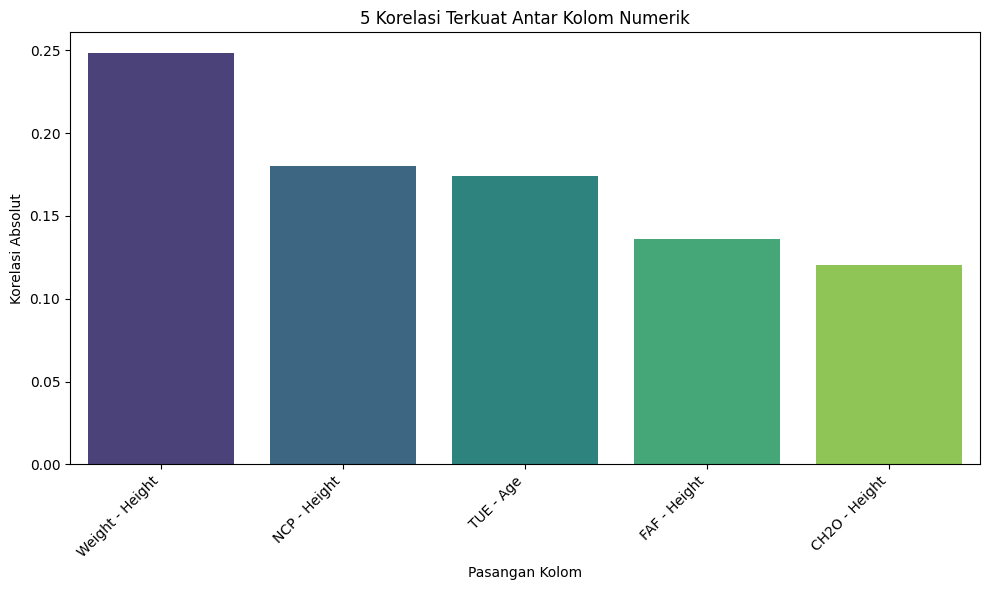

In [22]:
# Visualisasikan dalam diagram batang
plt.figure(figsize=(10, 6))
sns.barplot(x='Pair', y='Correlation', data=correlation_data, palette='viridis')
plt.title('5 Korelasi Terkuat Antar Kolom Numerik')  # Menambahkan judul grafik
plt.xlabel('Pasangan Kolom')
plt.ylabel('Korelasi Absolut')
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar terbaca
plt.tight_layout()  # Untuk mencegah label tumpang tindih
plt.show()  # Menampilkan grafik

Tipe Data dan Missing Values: Dataset memiliki 17 kolom dan 2111 entri. Semua kolom terdeteksi sebagai tipe data 'object', yang mengindikasikan bahwa semua kolom, termasuk yang seharusnya numerik (seperti Age, Height, dan Weight) Distribusi Data Numerik terhadap Kategori Obesitas:

Age: Distribusi umur bervariasi antar kategori obesitas, dengan beberapa kategori menunjukkan rentang umur yang lebih luas dan beberapa outlier.
Height: Tinggi badan juga menunjukkan variasi antar kategori, dengan beberapa outlier yang cukup tinggi.
Weight: Berat badan menunjukkan perbedaan yang signifikan antar kategori obesitas, di mana kategori obesitas yang lebih tinggi memiliki berat badan yang jauh lebih tinggi.
FCVC, NCP, CH2O, FAF, TUE: Fitur-fitur lain seperti FCVC (konsumsi sayuran), NCP (jumlah makanan utama), CH2O (konsumsi air), FAF (aktivitas fisik), dan TUE (waktu penggunaan perangkat teknologi) juga menunjukkan distribusi yang berbeda antar kategori obesitas, dengan beberapa outlier yang ekstrem.